In [5]:
import pandas as pd

In [7]:
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Handling warnings
import warnings

# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# For preprocessing the data: Label Encoding and Standard Scaling
from sklearn.preprocessing import LabelEncoder, StandardScaler

# For building models
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier   # K-Nearest Neighbors model

# For evaluating models
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# For checking data skewness
from scipy.stats import skew

# Additional Plotly imports for advanced plotting and graph creation
import plotly.express as px  # Repeated import of Plotly for consistency
import plotly.graph_objects as go  # For creating detailed graphs
import math
from plotly.subplots import make_subplots  # For creating subplots in Plotly
from numpy import linalg as LA  # Linear algebra functions for advanced computations

# Feature selection
from sklearn.feature_selection import RFE  # Recursive Feature Elimination for feature selection

# Data splitting again (re-import, same as above)
from sklearn.model_selection import train_test_split

# Support Vector Machine for classification
from sklearn.svm import SVC

# For resampling and dealing with imbalanced datasets
from sklearn.utils import resample


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

warnings.filterwarnings('ignore')


# Loading the dataset

In [8]:
df = pd.read_csv('C:/Users/Divyanshu/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Data exploration

In [9]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [10]:
df.shape

(1470, 35)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [13]:
df.duplicated().sum()

0

In [14]:
df.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [15]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

# DATA CLEANING & REDUCTION

In [16]:
df.drop(columns = ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

# Exploratory Data Analysis

## distribution of employee attrition

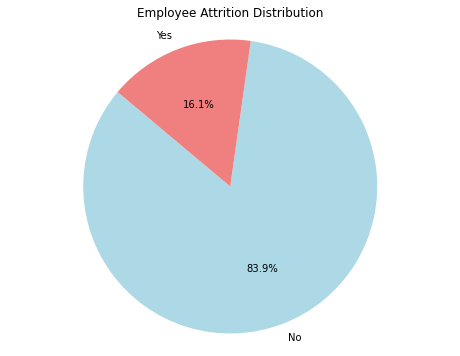

In [17]:
attrition_counts = df['Attrition'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Employee Attrition Distribution')
plt.axis('equal')
plt.show()

## Univariate Analysis on numerical columns

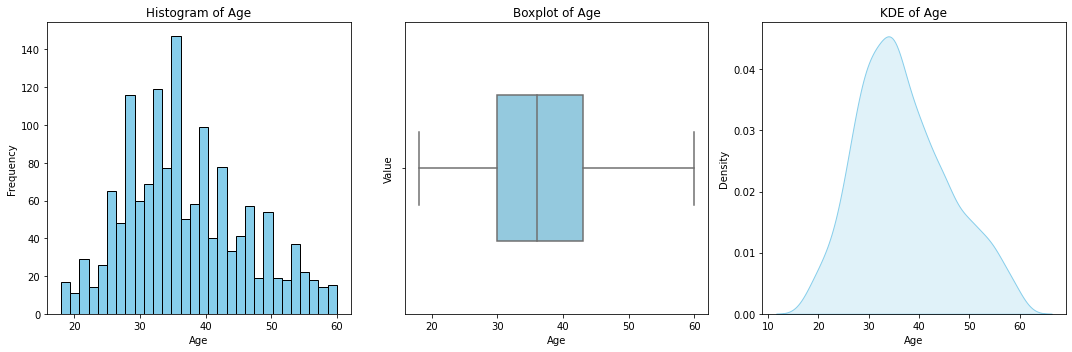

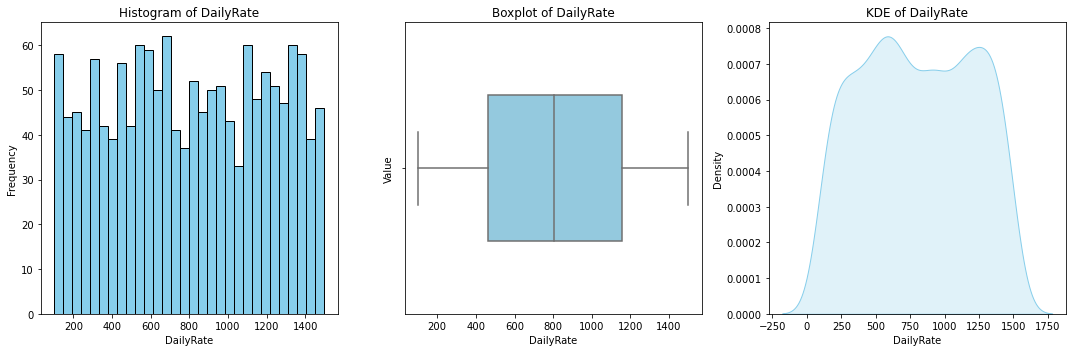

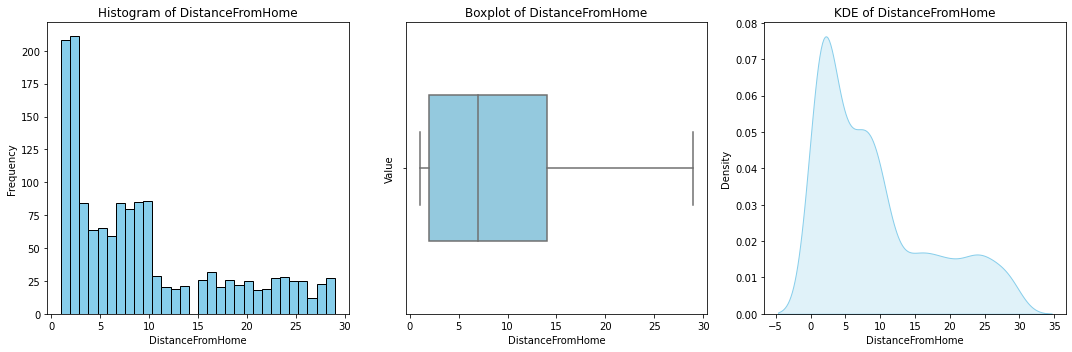

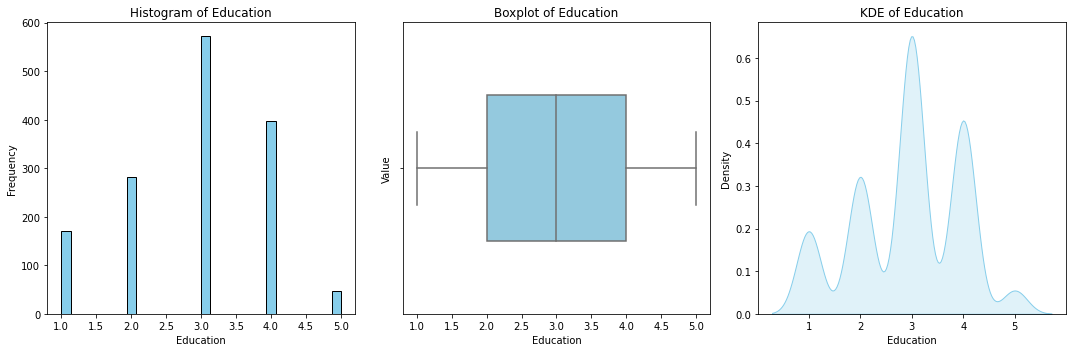

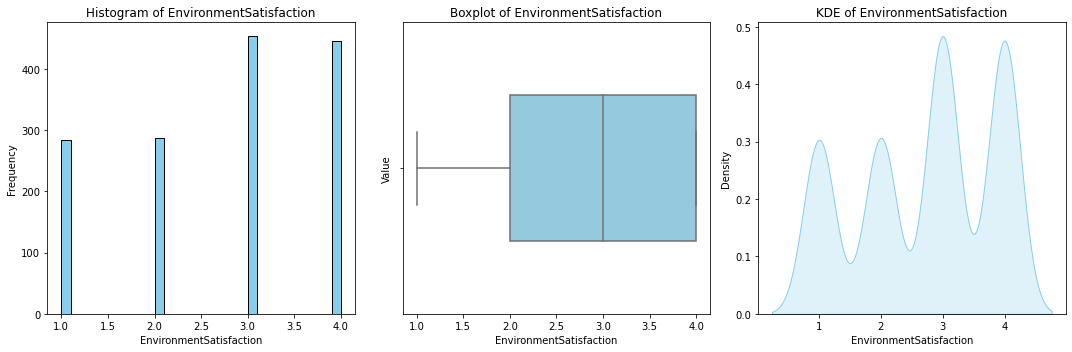

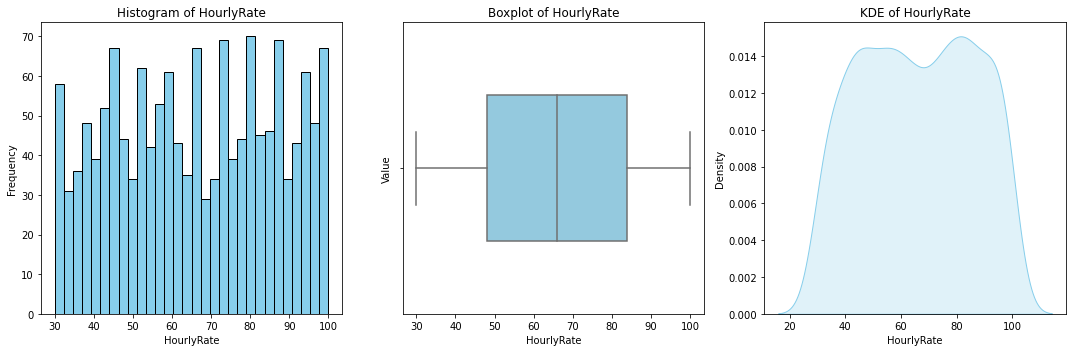

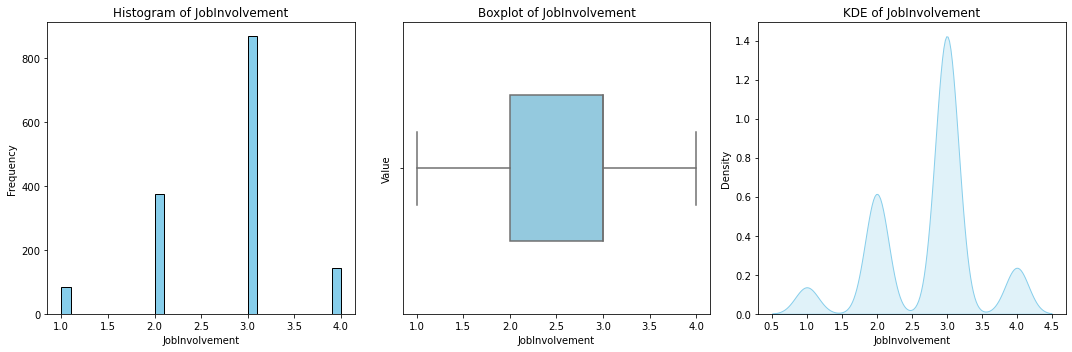

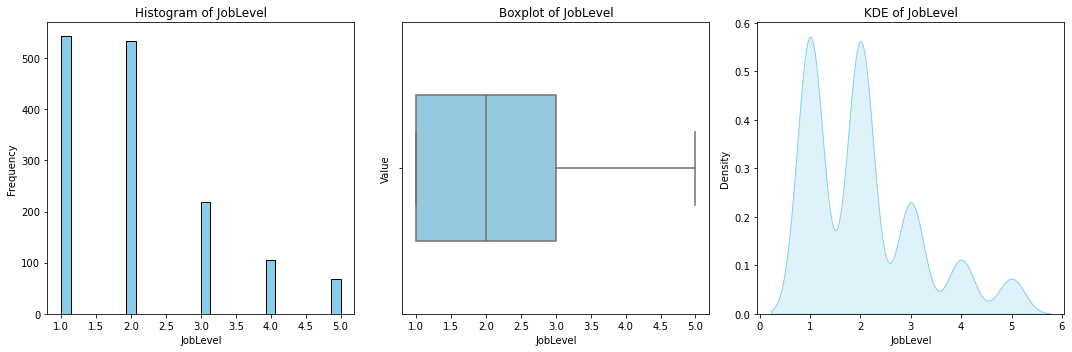

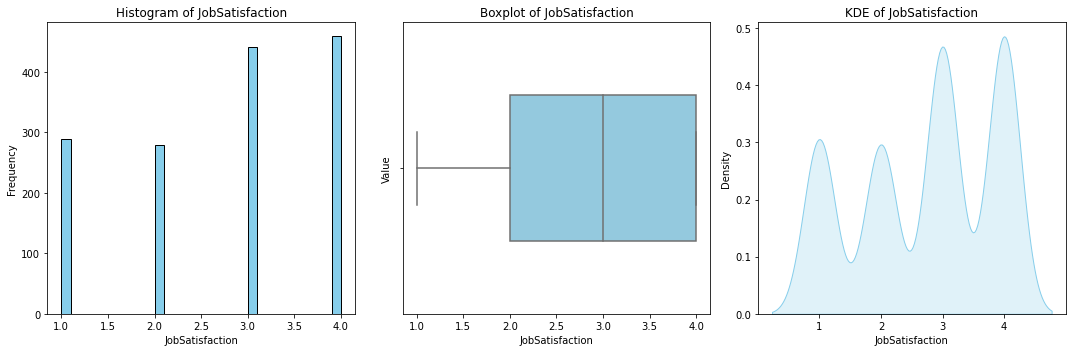

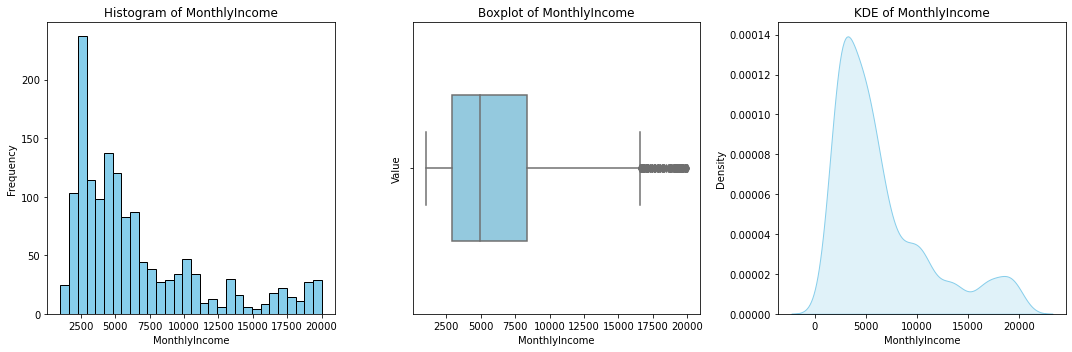

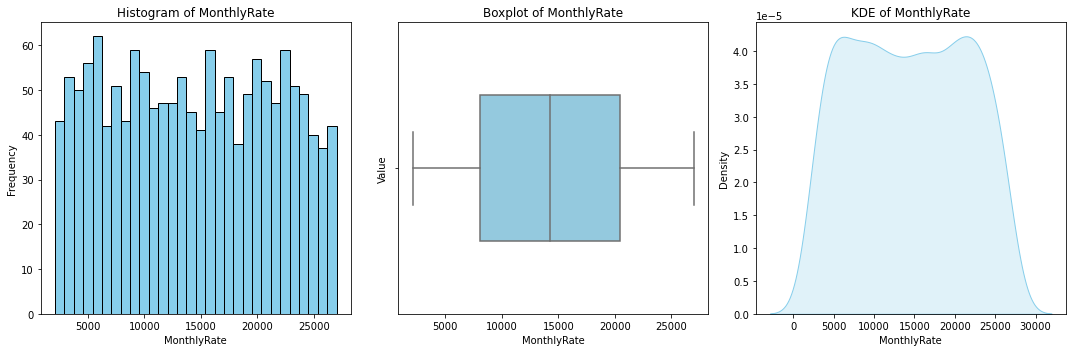

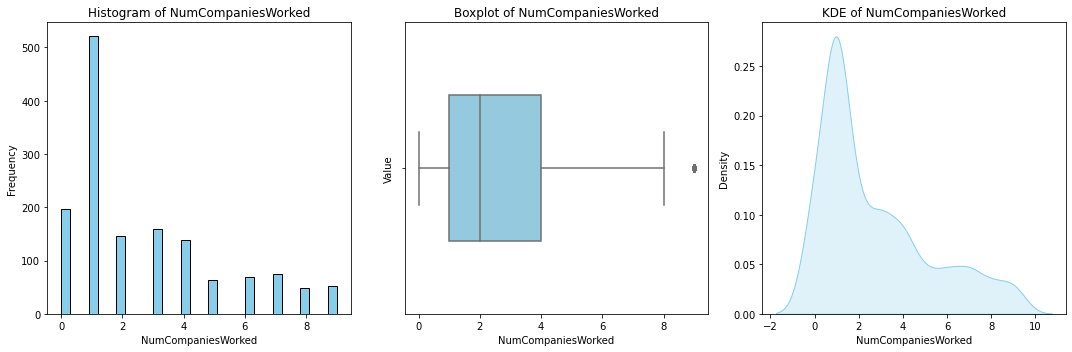

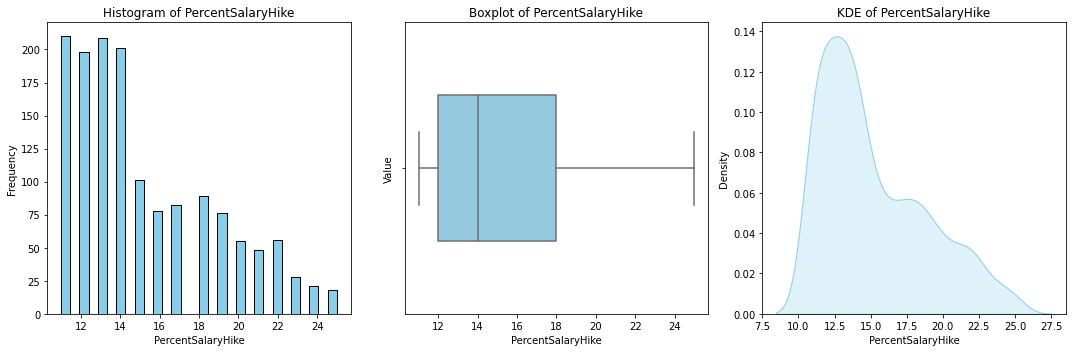

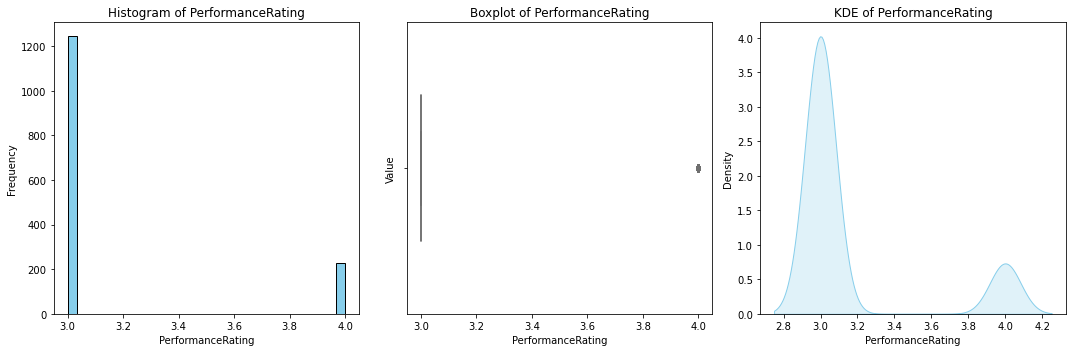

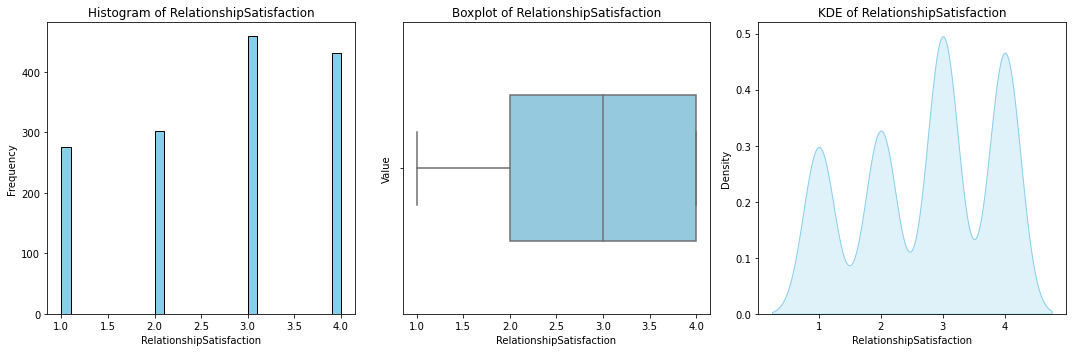

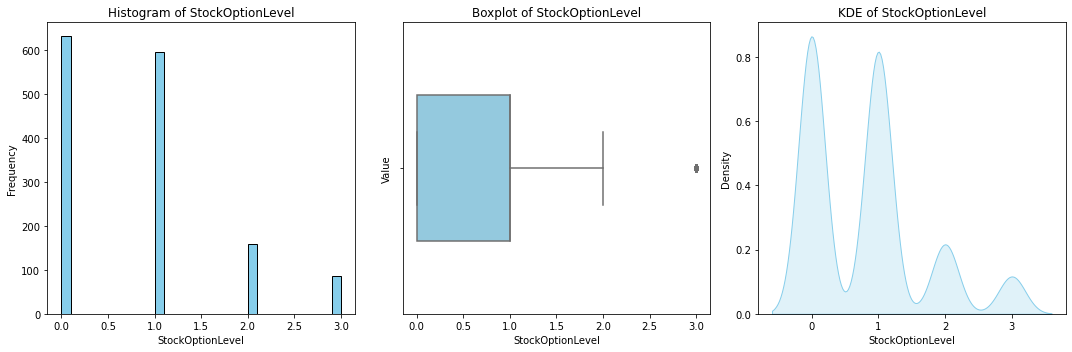

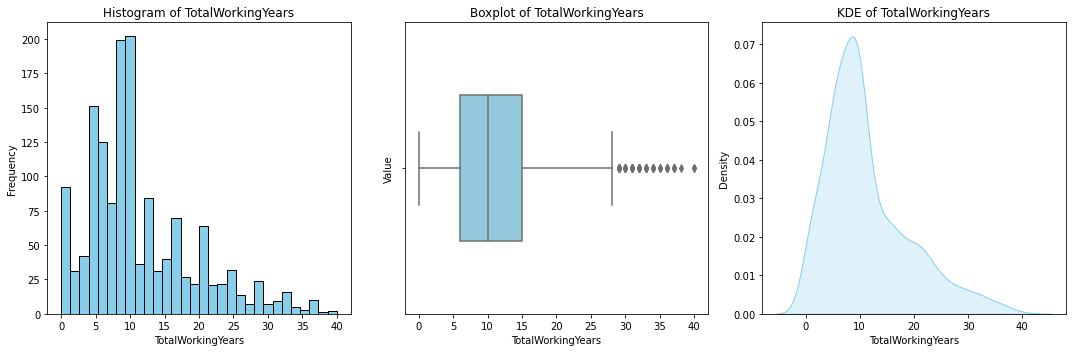

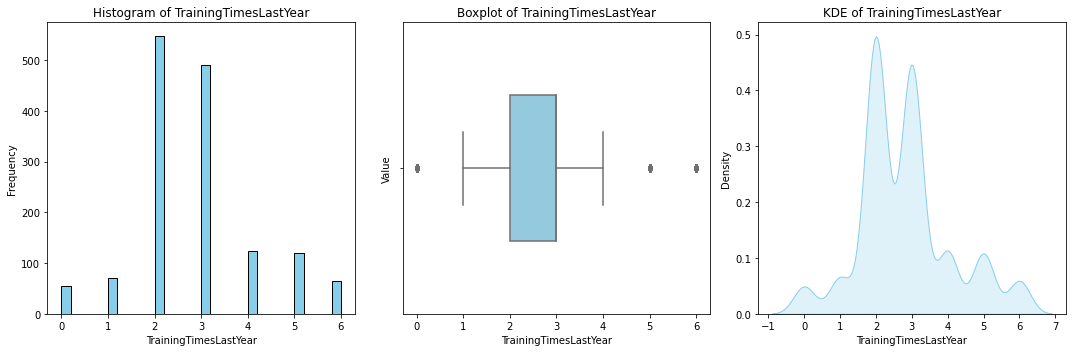

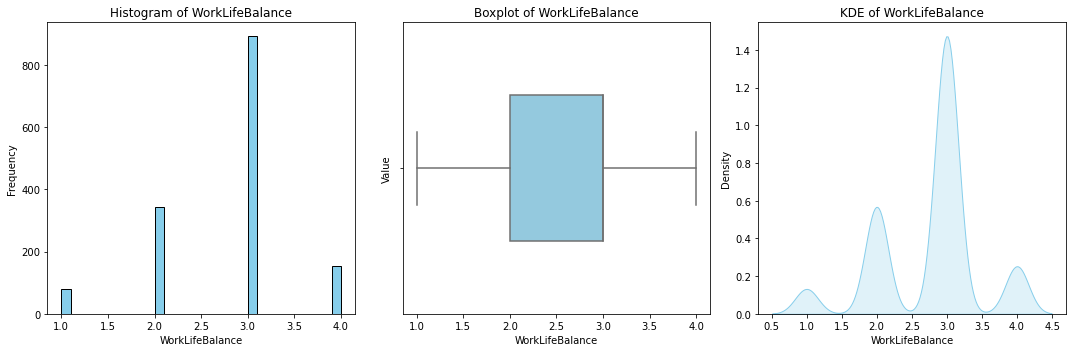

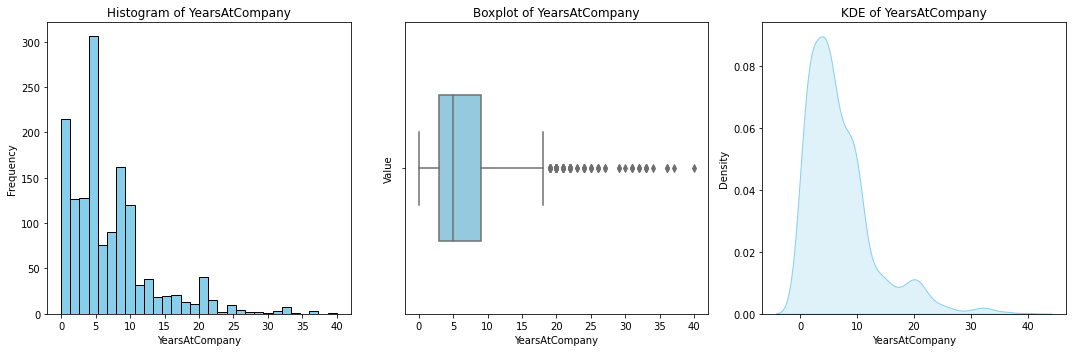

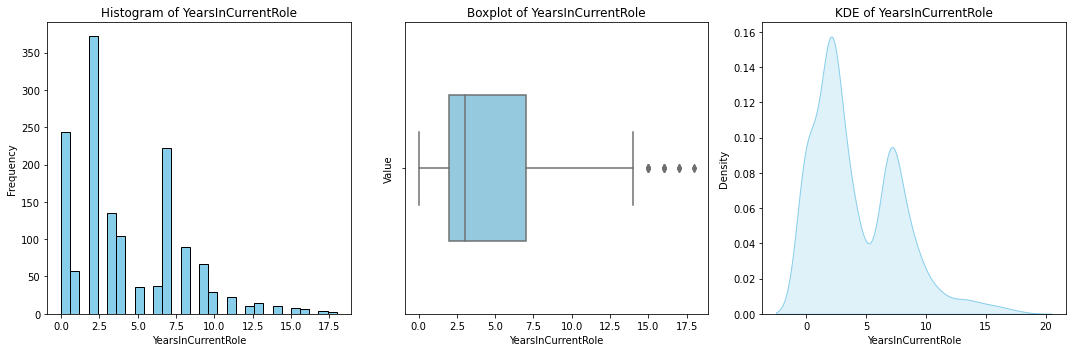

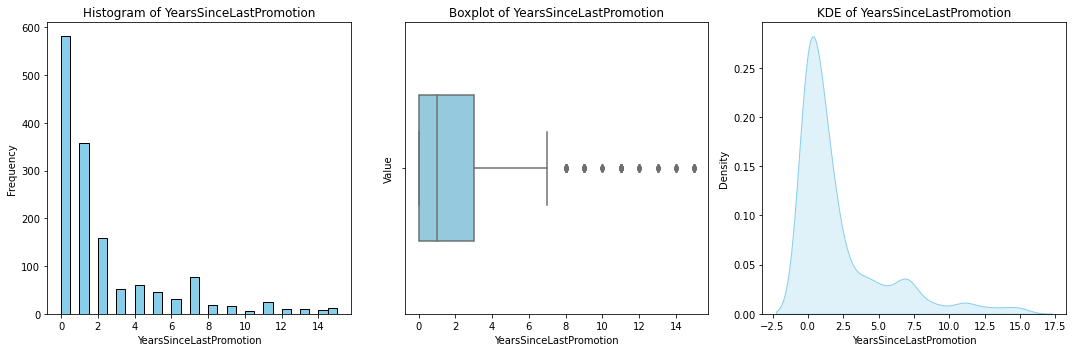

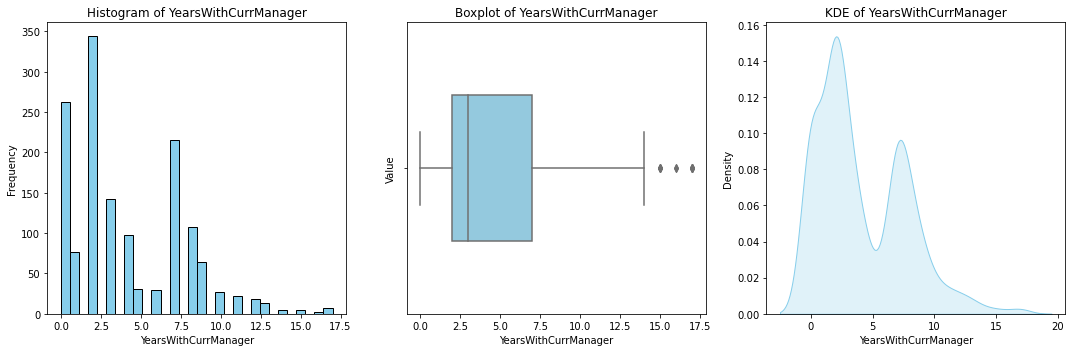

In [18]:
num_cols = df.select_dtypes(include=np.number).columns
numerical_data = df[num_cols]
for col in numerical_data[1:]:
    plt.figure(figsize=(15, 5))

    # Histogram
    plt.subplot(1, 3, 1)
    df[col].plot.hist(bins=30, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[col],color='skyblue', width=0.5)
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.title(f'Boxplot of {col}')

    # KDE plot
    plt.subplot(1, 3, 3)
    sns.kdeplot(df[col], color='skyblue', fill=True)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'KDE of {col}')

    plt.tight_layout()
    plt.show()

## Bivariate Analysis on numerical columns and Attrition

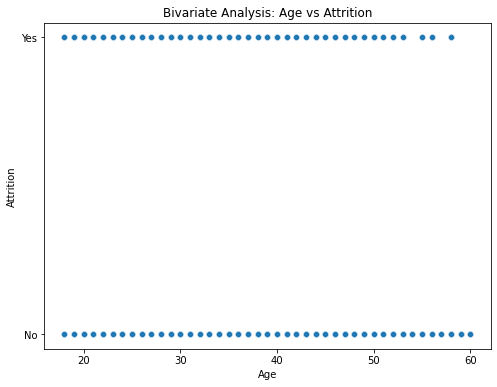

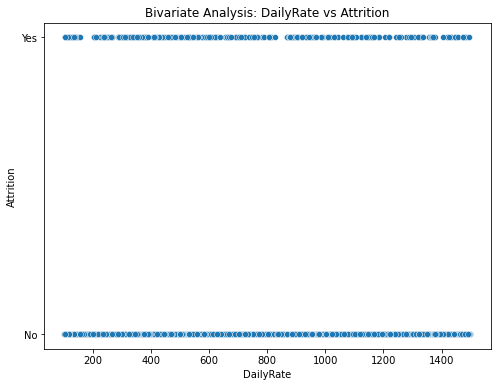

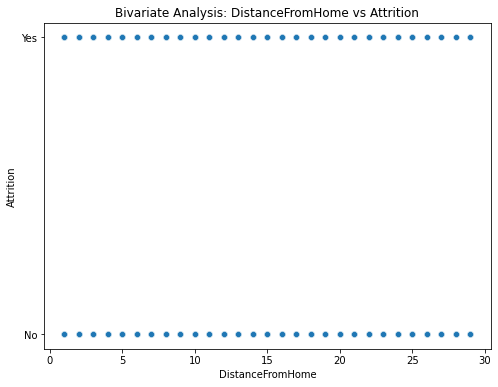

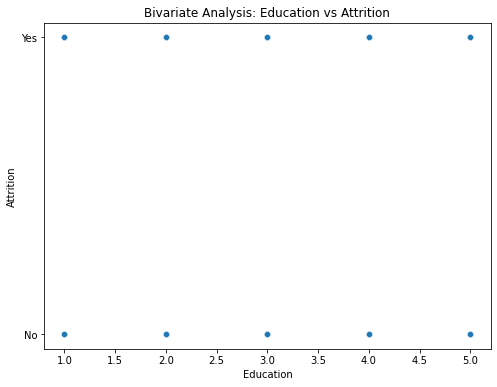

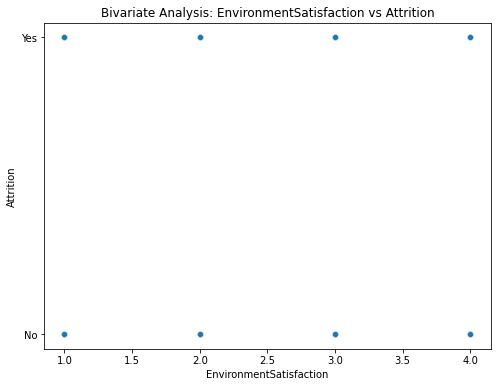

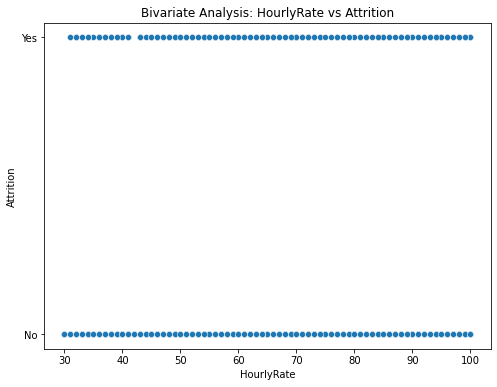

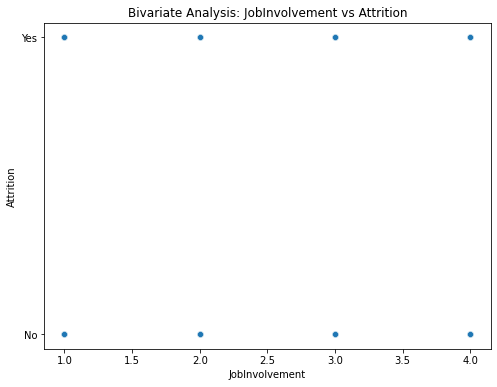

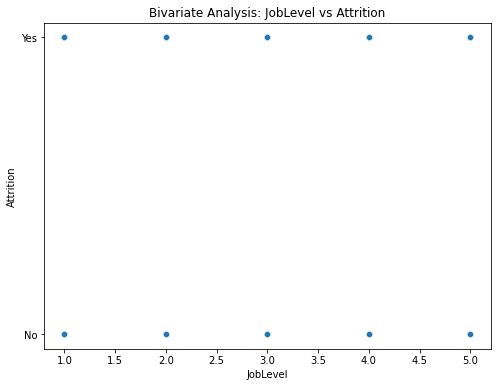

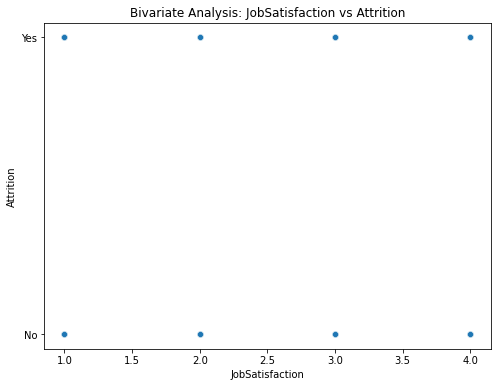

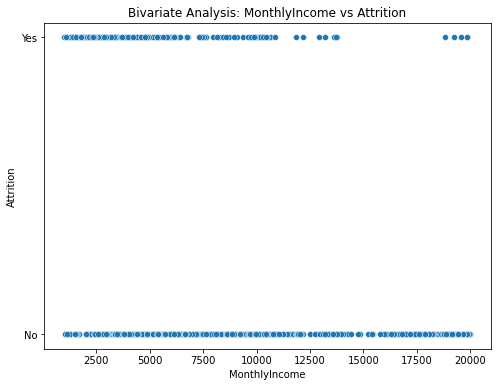

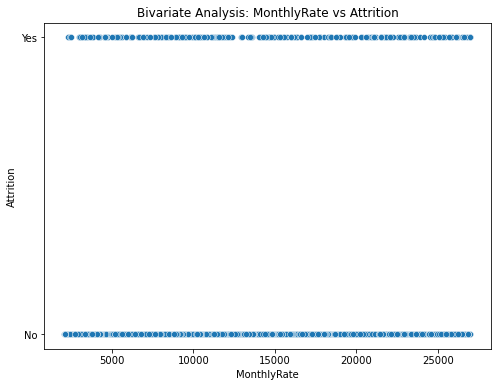

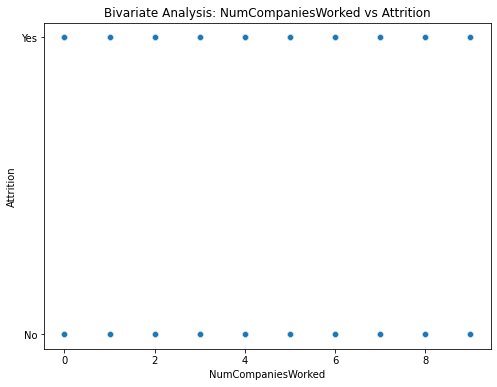

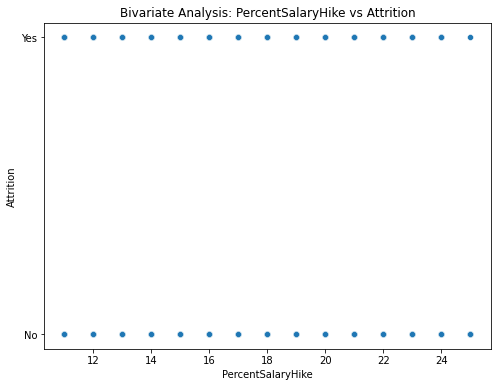

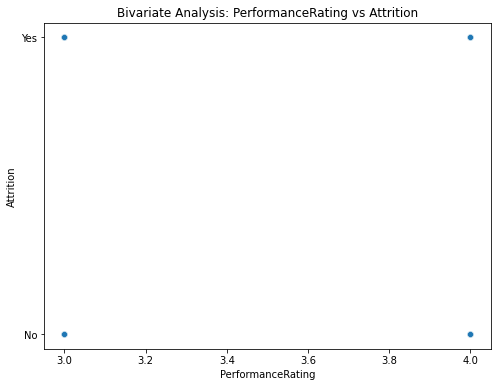

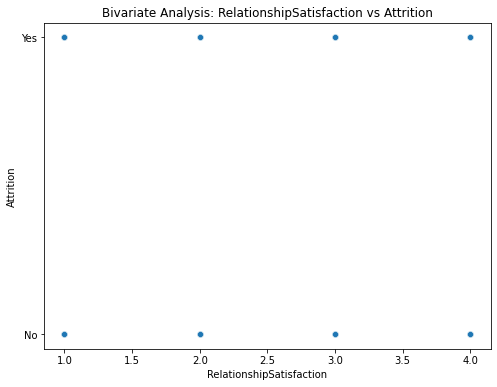

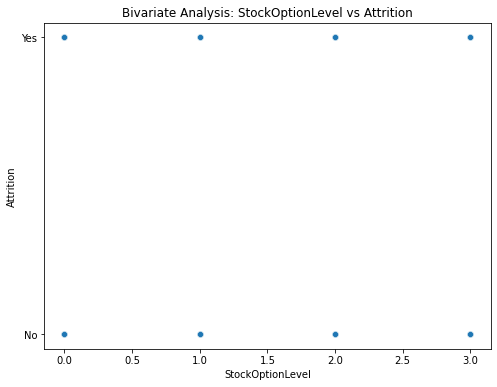

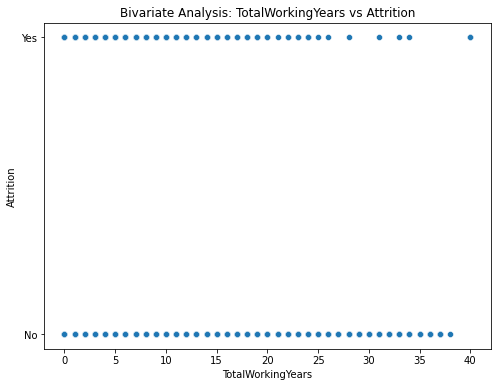

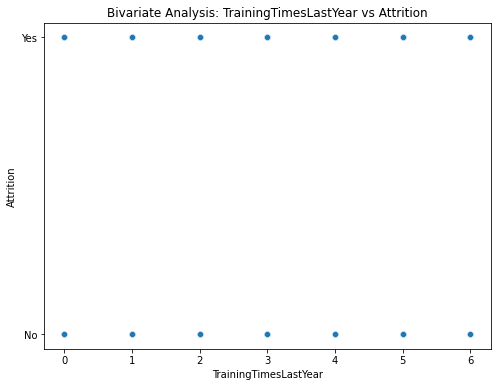

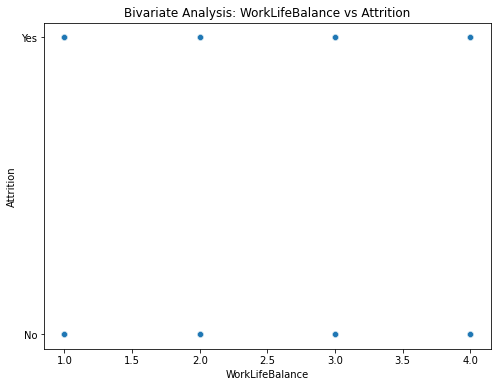

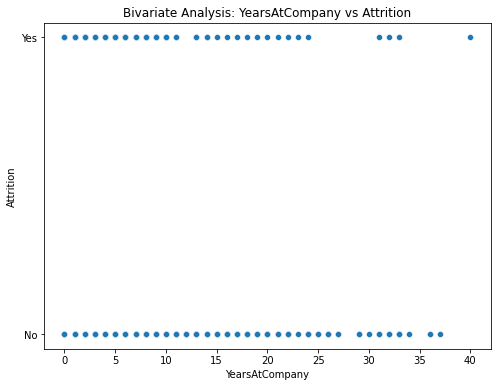

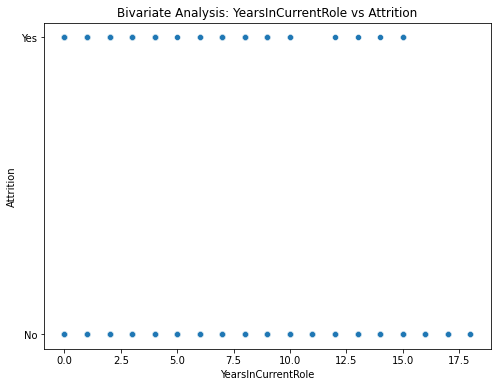

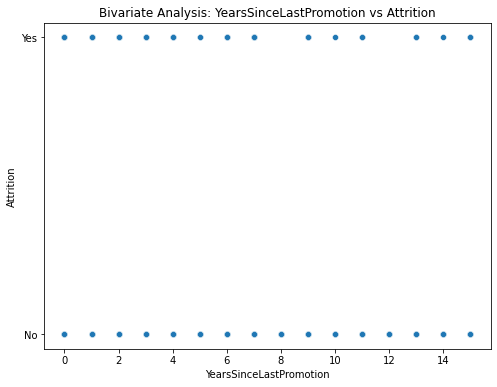

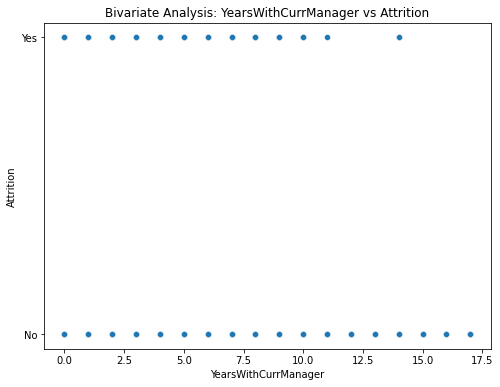

In [19]:
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y='Attrition', data=df, palette='tab10')
    plt.title(f'Attrition vs {col}')
    plt.xlabel(col)
    plt.ylabel('Attrition')
    plt.title(f'Bivariate Analysis: {col} vs Attrition')

## Attrition by Age

In [20]:
fig = px.histogram(df, x='Age', color='Attrition', barmode='group', nbins=20, title='Attrition by Age')
fig.update_layout(xaxis_title='Age', yaxis_title='Count')
fig.show()

- We noticed that younger employees tend to have higher attrition rate. This might mean they are more likely to quit, possibly to find better opportunities or because they have less experience.

## Attritiont by gender

In [21]:
fig = px.sunburst(df,path=['Gender','Attrition'], title='Gender Distribution')
fig.update_traces(textinfo='label+percent parent')
fig.update_layout(title_x=0.5)
fig.show()

## Attrition by Departments

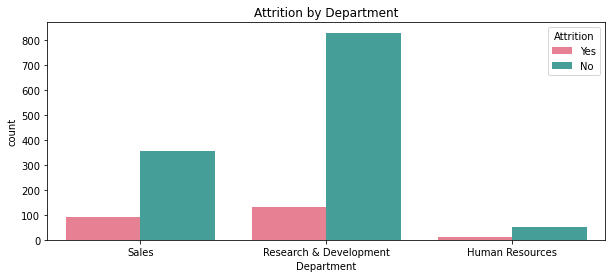

In [22]:
plt.figure(figsize=(10,4))
sns.countplot(x="Department", hue="Attrition", data=df, palette ='husl')
plt.title("Attrition by Department")
plt.show()

- Different departments can have different rates of employee turnover, influenced by factors like the type of work, workplace culture, or management approach.

- The Research & Development department shows a much higher attrition rate, which may require a closer look into potential reasons such as workload, leadership style, or employee satisfaction.

## Attrition by job level

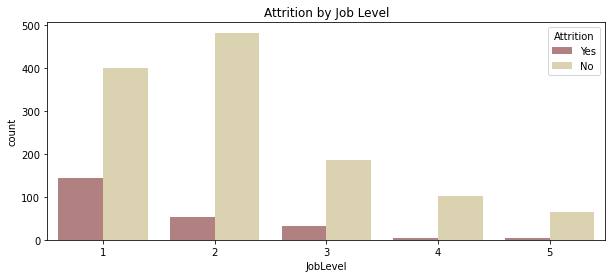

In [23]:
plt.figure(figsize=(10,4))
sns.countplot(x="JobLevel", hue="Attrition", data=df, palette='pink')
plt.title("Attrition by Job Level")
plt.show()

- Higher job levels might have lower attrition rates due to better compensation and job satisfaction, while higher attrition at lower levels suggests that entry-level employees are more likely to leave.

## Monthly Income by Attrition

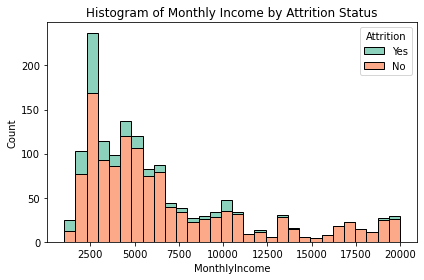

In [24]:
sns.histplot(data=df, x='MonthlyIncome', hue='Attrition', multiple='stack', bins=30, palette='Set2')
plt.title('Histogram of Monthly Income by Attrition Status')

plt.tight_layout()
plt.show()

- Income levels may impact an employee’s decision to stay or leave the company. Lower-paid employees might have higher attrition rates.
- As we can see the attrition is higher among employees with lower incomes, this could suggest that salary increases might help reduce turnover

## Total Working Years by Attrition

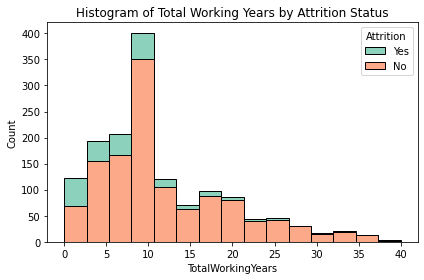

In [25]:
sns.histplot(data=df, x='TotalWorkingYears', hue='Attrition', multiple='stack', bins=15, palette='Set2')
plt.title('Histogram of Total Working Years by Attrition Status')

plt.tight_layout()
plt.show()

- Employees with more years of experience might be less likely to leave, as they may have more stability or satisfaction in their careers.
- The employees with fewer working years show higher attrition, this may indicate that less experienced employees are more likely to leave.

## Connection between salary and work experience

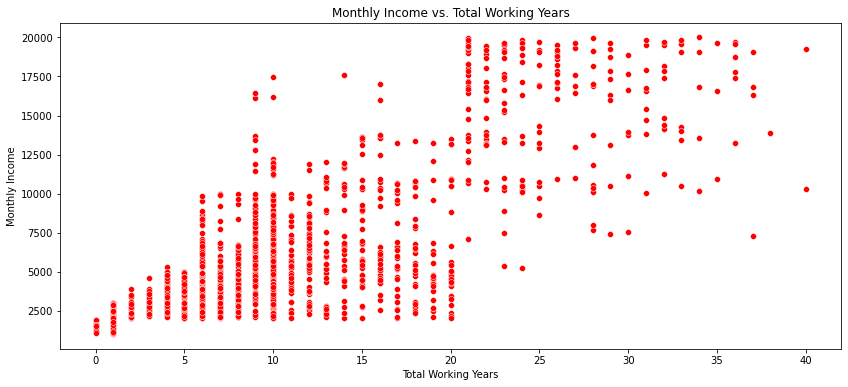

In [26]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='TotalWorkingYears', y='MonthlyIncome', data=df, color='r')
plt.title('Monthly Income vs. Total Working Years')
plt.xlabel('Total Working Years')
plt.ylabel('Monthly Income')
plt.show()


- This plot helps us observe whether more experienced employees (with more working years) tend to earn higher salaries and if this relationship varies by job role.

# Data Preprocessing

## Outliers

In [27]:
features_with_outliers = []
for feature in num_cols:
    percentile25 = df[feature].quantile(0.25)
    percentile75 = df[feature].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    outliers = df[(df[feature] > upper_limit) | (df[feature] < lower_limit)]
    proportion_of_outliers = len(outliers) / len(df) * 100
    if len(outliers) > 0:
        features_with_outliers.append(feature)
        print(f"Feature: {feature}")
        print(f"Number of outliers: {len(outliers)}")
        print(f"Proportion of outliers: {proportion_of_outliers:.2f}%\n")

Feature: MonthlyIncome
Number of outliers: 114
Proportion of outliers: 7.76%

Feature: NumCompaniesWorked
Number of outliers: 52
Proportion of outliers: 3.54%

Feature: PerformanceRating
Number of outliers: 226
Proportion of outliers: 15.37%

Feature: StockOptionLevel
Number of outliers: 85
Proportion of outliers: 5.78%

Feature: TotalWorkingYears
Number of outliers: 63
Proportion of outliers: 4.29%

Feature: TrainingTimesLastYear
Number of outliers: 238
Proportion of outliers: 16.19%

Feature: YearsAtCompany
Number of outliers: 104
Proportion of outliers: 7.07%

Feature: YearsInCurrentRole
Number of outliers: 21
Proportion of outliers: 1.43%

Feature: YearsSinceLastPromotion
Number of outliers: 107
Proportion of outliers: 7.28%

Feature: YearsWithCurrManager
Number of outliers: 14
Proportion of outliers: 0.95%



## Check Skewness

In [28]:
skewed_features = {}
skewed_columns = []


for feature in num_cols:
    skewness = df[feature].skew()
    skewed_features[feature] = skewness
    if skewness > 0.5:
        print(f"{feature} is right skewed with skewness: {skewness}")

for feature in num_cols:
    if skewed_features[feature] > 0.5:
        skewed_columns.append(feature)
        df[feature] = np.log1p(df[feature])


print("Log transformation applied to right-skewed features.")

DistanceFromHome is right skewed with skewness: 0.9581179956568269
JobLevel is right skewed with skewness: 1.0254012829518246
MonthlyIncome is right skewed with skewness: 1.3698166808390662
NumCompaniesWorked is right skewed with skewness: 1.026471111968205
PercentSalaryHike is right skewed with skewness: 0.8211279755780908
PerformanceRating is right skewed with skewness: 1.921882702142603
StockOptionLevel is right skewed with skewness: 0.9689803167738937
TotalWorkingYears is right skewed with skewness: 1.1171718528128527
TrainingTimesLastYear is right skewed with skewness: 0.5531241710537028
YearsAtCompany is right skewed with skewness: 1.7645294543422085
YearsInCurrentRole is right skewed with skewness: 0.9173631562908262
YearsSinceLastPromotion is right skewed with skewness: 1.9842899833524859
YearsWithCurrManager is right skewed with skewness: 0.8334509919918475
Log transformation applied to right-skewed features.


## Feature Engineering

In [29]:
df['WorkExperience'] = df[['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
                                'YearsSinceLastPromotion', 'YearsWithCurrManager']].mean(axis=1)

In [30]:
df['OverallSatisfaction'] = (
    df[['JobSatisfaction' , 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']].mean(axis=1)
)

- Work Experience: TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, and YearsWithCurrentManager show strong positive correlations. This makes sense because the longer someone works for a company, the longer they stay in the same role and with the same manager.

- OverallSatisfaction : JobSatisfaction , EnvironmentSatisfaction, RelationshipSatisfaction and WorkLifeBalance

In [31]:
df=df.drop(['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
            'YearsSinceLastPromotion', 'JobSatisfaction' , 'EnvironmentSatisfaction',
            'RelationshipSatisfaction', 'WorkLifeBalance'],axis=1)

## Categorical Encoding

In [32]:
cat_cols = df.select_dtypes(include = ['object'])

# Create a LabelEncoder object
label_encoder = LabelEncoder()
categorical_cols = cat_cols
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2          0.693147   
1   49          0               1        279           1          2.197225   
2   37          1               2       1373           1          1.098612   
3   33          0               1       1392           1          1.386294   
4   27          0               2        591           1          1.098612   

   Education  EducationField  Gender  HourlyRate  ...  MonthlyRate  \
0          2               1       0          94  ...        19479   
1          1               1       1          61  ...        24907   
2          2               4       1          92  ...         2396   
3          4               1       0          56  ...        23159   
4          1               3       1          40  ...        16632   

   NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  \
0            2.197225         1           2.484907           1.386294   
1            0.693147         0           3.178054           1.609438   
2            1.945910         1           2.772589           1.386294   
3            0.693147         1           2.484907           1.386294   
4            2.302585         0           2.564949           1.386294   

   StockOptionLevel  TrainingTimesLastYear  YearsWithCurrManager  \
0          0.000000               0.000000              1.791759   
1          0.693147               1.386294              2.079442   
2          0.000000               1.386294              0.000000   
3          0.000000               1.386294              0.000000   
4          0.693147               1.386294              1.098612   

   WorkExperience  OverallSatisfaction  
0        1.508866                 2.00  
1        1.929564                 3.00  
2        0.415888                 3.00  
3        1.572037                 3.25  
4        1.268072                 2.50  

[5 rows x 25 columns]

In [33]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
       'TrainingTimesLastYear', 'YearsWithCurrManager', 'WorkExperience',
       'OverallSatisfaction'],
      dtype='object')

## Splitting

In [34]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)  # Selecting all columns except the target
y = df['Attrition']                # Selecting the target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1176, 24)
X_test shape: (294, 24)
y_train shape: (1176,)
y_test shape: (294,)


## Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Solve imbalance data problem

In [36]:
!pip install imblearn


In [37]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
print("Before Smoote" , y_train.value_counts())

X_train, y_train = smote.fit_resample(X_train, y_train)

print("\n After Smoote" , y_train.value_counts())

Before Smoote 0    986
1    190
Name: Attrition, dtype: int64

 After Smoote 0    986
1    986
Name: Attrition, dtype: int64


# Modeling

### LogisticRegression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)

# Make predictions on the test data

y_test_predict = model.predict(X_test)

In [39]:
# Classification Report
print("=================================================================================================")
print("Classification Report for Logistic Regression Model (Train Set):")
print(classification_report(y_train, y_train_predict))

print("=================================================================================================")
print("Classification Report for Logistic Regression Model (Test Set):")
print(classification_report(y_test, y_test_predict))

Classification Report for Logistic Regression Model (Train Set):
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       986
           1       0.77      0.78      0.78       986

    accuracy                           0.78      1972
   macro avg       0.78      0.78      0.78      1972
weighted avg       0.78      0.78      0.78      1972

Classification Report for Logistic Regression Model (Test Set):
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       247
           1       0.35      0.70      0.46        47

    accuracy                           0.74       294
   macro avg       0.64      0.73      0.65       294
weighted avg       0.84      0.74      0.77       294



<AxesSubplot:>

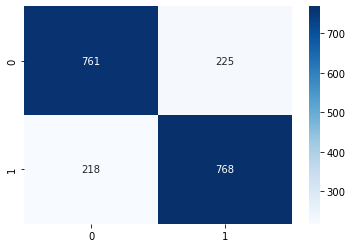

In [40]:
cm = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

### KNN

In [41]:
# Create a K-Nearest Neighbors model (with 5 neighbors, you can adjust this value)
model = KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='auto', 
                             leaf_size=50, p=2, metric='minkowski', metric_params=None, n_jobs=None)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the training data
y_train_predict = model.predict(X_train)

# Make predictions on the test data
y_test_predict = model.predict(X_test)

In [42]:
# Classification Report for Train Set
print("=================================================================================================")
print("Classification Report for KNN Model (Train Set):")
print(classification_report(y_train, y_train_predict))

# Classification Report for Test Set
print("=================================================================================================")
print("Classification Report for KNN Model (Test Set):")
print(classification_report(y_test, y_test_predict))

Classification Report for KNN Model (Train Set):
              precision    recall  f1-score   support

           0       0.98      0.71      0.82       986
           1       0.77      0.98      0.87       986

    accuracy                           0.85      1972
   macro avg       0.87      0.85      0.84      1972
weighted avg       0.87      0.85      0.84      1972

Classification Report for KNN Model (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.64      0.75       247
           1       0.27      0.70      0.39        47

    accuracy                           0.65       294
   macro avg       0.59      0.67      0.57       294
weighted avg       0.81      0.65      0.69       294



<AxesSubplot:>

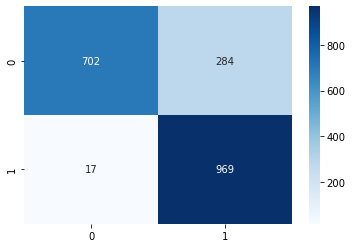

In [43]:
cm = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

### SVM

In [44]:
# Create a SVM model
model = SVC(C=200.0, kernel='rbf', degree=5, gamma='scale', coef0=2, shrinking=True,
            probability=False, tol=0.1, cache_size=200, class_weight=None, verbose=False, max_iter=-1, 
            decision_function_shape='ovr', break_ties=False, random_state=None)

# Train the model
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)

# Make predictions on the test data

y_test_predict = model.predict(X_test)

In [45]:
# Classification Report for Train Set
print("=================================================================================================")
print("Classification Report for SVM Model (Train Set):")
print(classification_report(y_train, y_train_predict))

# Classification Report for Test Set
print("=================================================================================================")
print("Classification Report for SVM Model (Test Set):")
print(classification_report(y_test, y_test_predict))

Classification Report for SVM Model (Train Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       986

    accuracy                           1.00      1972
   macro avg       1.00      1.00      1.00      1972
weighted avg       1.00      1.00      1.00      1972

Classification Report for SVM Model (Test Set):
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       247
           1       0.41      0.32      0.36        47

    accuracy                           0.82       294
   macro avg       0.64      0.62      0.62       294
weighted avg       0.80      0.82      0.81       294



<AxesSubplot:>

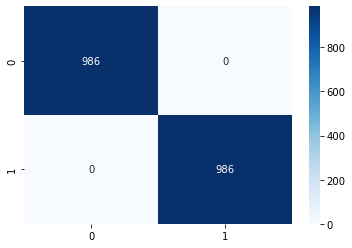

In [46]:
cm = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

In [47]:
model = GaussianNB()

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)

# Make predictions on the test data

y_test_predict = model.predict(X_test)

In [48]:
# Classification Report for Train Set
print("=================================================================================================")
print("Classification Report for GaussianNB Model (Train Set):")
print(classification_report(y_train, y_train_predict))

# Classification Report for Test Set
print("=================================================================================================")
print("Classification Report for GaussianNB Model (Test Set):")
print(classification_report(y_test, y_test_predict))

Classification Report for GaussianNB Model (Train Set):
              precision    recall  f1-score   support

           0       0.76      0.75      0.76       986
           1       0.75      0.76      0.76       986

    accuracy                           0.76      1972
   macro avg       0.76      0.76      0.76      1972
weighted avg       0.76      0.76      0.76      1972

Classification Report for GaussianNB Model (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.68      0.78       247
           1       0.29      0.68      0.41        47

    accuracy                           0.68       294
   macro avg       0.60      0.68      0.60       294
weighted avg       0.82      0.68      0.72       294



<AxesSubplot:>

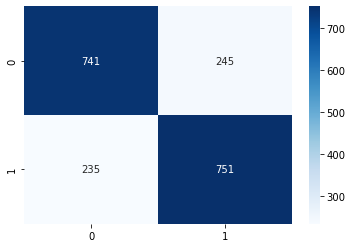

In [49]:
cm = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

### DecisionTreeClassifier

In [50]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)

# Make predictions on the test data

y_test_predict = model.predict(X_test)

In [51]:
# Classification Report for Train Set
print("=================================================================================================")
print("Classification Report for DecisionTreeClassifier Model (Train Set):")
print(classification_report(y_train, y_train_predict))

# Classification Report for Test Set
print("=================================================================================================")
print("Classification Report for DecisionTreeClassifier Model (Test Set):")
print(classification_report(y_test, y_test_predict))

Classification Report for DecisionTreeClassifier Model (Train Set):
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       986
           1       0.85      0.88      0.86       986

    accuracy                           0.86      1972
   macro avg       0.86      0.86      0.86      1972
weighted avg       0.86      0.86      0.86      1972

Classification Report for DecisionTreeClassifier Model (Test Set):
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       247
           1       0.38      0.70      0.49        47

    accuracy                           0.77       294
   macro avg       0.66      0.74      0.67       294
weighted avg       0.84      0.77      0.79       294



<AxesSubplot:>

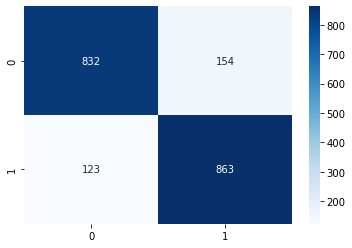

In [52]:
cm = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

### Random Forest

In [53]:
model = RandomForestClassifier(n_estimators=200, max_depth=5, max_features='sqrt', random_state=42)

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)

# Make predictions on the test data

y_test_predict = model.predict(X_test)

In [54]:
# Classification Report for Train Set
print("=================================================================================================")
print("Classification Report for Random Forest Model (Train Set):")
print(classification_report(y_train, y_train_predict))

# Classification Report for Test Set
print("=================================================================================================")
print("Classification Report for Random Forest Model (Test Set):")
print(classification_report(y_test, y_test_predict))

Classification Report for Random Forest Model (Train Set):
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       986
           1       0.94      0.89      0.92       986

    accuracy                           0.92      1972
   macro avg       0.92      0.92      0.92      1972
weighted avg       0.92      0.92      0.92      1972

Classification Report for Random Forest Model (Test Set):
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       247
           1       0.42      0.49      0.45        47

    accuracy                           0.81       294
   macro avg       0.66      0.68      0.67       294
weighted avg       0.82      0.81      0.82       294



<AxesSubplot:>

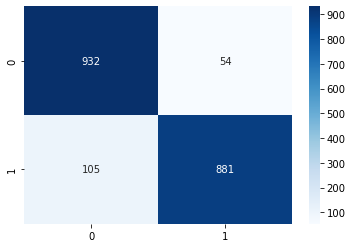

In [55]:
cm = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

### AdaBoostClassifier

In [56]:
model = AdaBoostClassifier(n_estimators=150, learning_rate=0.01, algorithm='SAMME', random_state=42)

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)

# Make predictions on the test data

y_test_predict = model.predict(X_test)

In [57]:
# Classification Report for Train Set
print("=================================================================================================")
print("Classification Report for AdaBoost Classifier Model (Train Set):")
print(classification_report(y_train, y_train_predict))

# Classification Report for Test Set
print("=================================================================================================")
print("Classification Report for AdaBoost Classifier Model (Test Set):")
print(classification_report(y_test, y_test_predict))

Classification Report for AdaBoost Classifier Model (Train Set):
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       986
           1       0.81      0.72      0.76       986

    accuracy                           0.78      1972
   macro avg       0.78      0.78      0.78      1972
weighted avg       0.78      0.78      0.78      1972

Classification Report for AdaBoost Classifier Model (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       247
           1       0.38      0.62      0.47        47

    accuracy                           0.78       294
   macro avg       0.65      0.71      0.66       294
weighted avg       0.83      0.78      0.80       294



<AxesSubplot:>

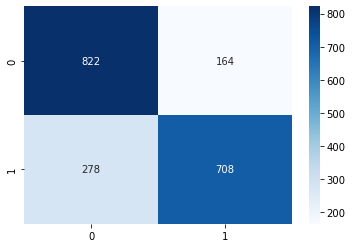

In [58]:
cm = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

### GradientBoostingClassifier

In [59]:
model = GradientBoostingClassifier(
    learning_rate=0.005,
    n_estimators=350,
    max_depth=3,
    random_state=42,
    max_features='sqrt'
)

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)

# Make predictions on the test data

y_test_predict = model.predict(X_test)

In [60]:
# Classification Report for Train Set
print("=================================================================================================")
print("Classification Report for GradientBoostingClassifier Model (Train Set):")
print(classification_report(y_train, y_train_predict))

# Classification Report for Test Set
print("=================================================================================================")
print("Classification Report for GradientBoostingClassifier Model (Test Set):")
print(classification_report(y_test, y_test_predict))

Classification Report for GradientBoostingClassifier Model (Train Set):
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       986
           1       0.91      0.87      0.89       986

    accuracy                           0.89      1972
   macro avg       0.89      0.89      0.89      1972
weighted avg       0.89      0.89      0.89      1972

Classification Report for GradientBoostingClassifier Model (Test Set):
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       247
           1       0.40      0.53      0.45        47

    accuracy                           0.80       294
   macro avg       0.65      0.69      0.66       294
weighted avg       0.82      0.80      0.81       294



<AxesSubplot:>

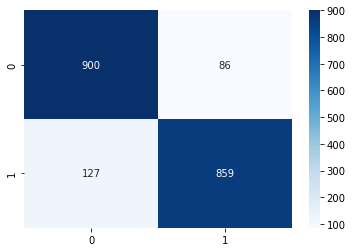

In [61]:
cm = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

### XGBoost

In [62]:
model = XGBClassifier(
    objective='binary:logistic',
    learning_rate=0.01,
    n_estimators=350,
    max_depth=3,
    random_state=42,
    max_features='sqrt',
)

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)

# Make predictions on the test data

y_test_predict = model.predict(X_test)

In [63]:
# Classification Report for Train Set
print("=================================================================================================")
print("Classification Report for XGBoost Model (Train Set):")
print(classification_report(y_train, y_train_predict))

# Classification Report for Test Set
print("=================================================================================================")
print("Classification Report for XGBoost Model (Test Set):")
print(classification_report(y_test, y_test_predict))

Classification Report for XGBoost Model (Train Set):
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       986
           1       0.95      0.90      0.92       986

    accuracy                           0.93      1972
   macro avg       0.93      0.93      0.93      1972
weighted avg       0.93      0.93      0.93      1972

Classification Report for XGBoost Model (Test Set):
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       247
           1       0.36      0.32      0.34        47

    accuracy                           0.80       294
   macro avg       0.62      0.60      0.61       294
weighted avg       0.79      0.80      0.79       294



# Conclusion

- We analyzed the dataset to extract meaningful insights using various techniques and machine learning models.

- StandardScaler was applied to standardize the features, promoting consistency and enhancing model performance.

- SMOTE (Synthetic Minority Over-sampling Technique) was used to tackle data imbalance by generating synthetic samples for the minority class, ensuring a more balanced training dataset.

- Nine different classifiers were trained, including logistic regression, decision trees, random forests, and others, to predict employee attrition.

- The performance of each model was evaluated to identify the most effective classifier for this dataset.

- Combining these techniques provided valuable insights into employee attrition patterns and improved prediction accuracy.

- Data scaling, dimensionality reduction, and imbalance-handling techniques were essential for enhancing the overall analysis.